In [36]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우의 경우
# plt.rcParams['font.family'] = 'AppleGothic'  # macOS의 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지


# 3.다변량 분포
> 하나의 스칼라에 대한 정규분포를 알아봤습니다. 이번장은 벡터의 정규분포, 즉 다변량 정규분포를 알아봅니다.


# 3.1 넘파이와 다차원 배열 
> 이 책에는 벡터와 행렬이 자주 등장합니다. 이번장에서는 넘파이를 사용해 벡터와 행렬을 다루는 방법을 알아봅니다.


### 3.1.1 다차원배열
> 다차원 배열은 값(원소) 여러개를 한번에 처리하기 위한 데이터 구조입니다. 원소의 배열에는 방향이 있고 이 방향을 축 (Axis)이라하고  축의 갯수를 차원(dimension)이라고 합니다.
$$
% 스칼라
\mathbf{스칼라} =
1 
$$
$$
% 벡터
\mathbf{벡터} = \begin{pmatrix}
1 \\
2 \\
3
\end{pmatrix}
$$
$$
% 행렬
행렬 = \begin{pmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{pmatrix}
$$



위에서부터 0차원 배열, 1차원 배열, 2차원 배열입니다.


% 벡터를 표현하는 두가지 방법
$$
\mathbf{열 벡터} = \begin{pmatrix}
1 \\
2 \\
3
\end{pmatrix}
$$
$$
\mathbf{행 벡터} = \begin{pmatrix}
1 & 2 & 3
\end{pmatrix}
$$

### 3.1.2 넘파이 배열 생성
> 넘파이로 벡터와 행렬만들기

In [37]:
import numpy as np

# 벡터 만들기
a = np.array([1,2,3])
print("a의 정보")
print(a.__class__)
print(a.shape)
print(a.ndim)
print("-----------")

# 행렬 만들기
b = np.array([[1,2,3],[4,5,6]])
print("b의 정보")
print(b.__class__)
print(b.shape)
print(b.ndim)
print("-----------")



a의 정보
<class 'numpy.ndarray'>
(3,)
1
-----------
b의 정보
<class 'numpy.ndarray'>
(2, 3)
2
-----------


### 3.1.3 원소별 연산
> 형상이 같은 두 다차원 배열에 대해 원소별 연산을 할 수 있습니다. 원소별 곱을 야다마르 곱이라고 합니다.


In [38]:
W = np.array([[1,2,3],[4,5,6]])
X = np.array([[1,2,3],[3,4,5]])
print(W+X)
print("-----------")
print(W*X)

[[ 2  4  6]
 [ 7  9 11]]
-----------
[[ 1  4  9]
 [12 20 30]]


### 3.1.4 백터의내적과 행렬곱
> 다음과 같이 원소수가 D인 벡터 x,y가 있습니다.
$$
\mathbf{x} = \begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_D
\end{pmatrix}
$$
$$
\mathbf{y} = \begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_D
\end{pmatrix}
$$

이 때 내적은 다음과 같이 정의됩니다.
$$
\mathbf{x} \cdot \mathbf{y} = x_1 y_1 + x_2 y_2 + \cdots + x_D y_D
$$

행렬곱 계산방법
행렬 A와 B의 곱 C = AB는 다음과 같이 계산됩니다:

A가 m × n 행렬이고 B가 n × p 행렬일 때,
$$
C_{ij} = \sum_{k=1}^n a_{ik}b_{kj}
$$

예를 들어 2×3 행렬 A와 3×2 행렬 B의 곱은 다음과 같습니다:
$$
A = \begin{pmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23}
\end{pmatrix}
$$

$$
B = \begin{pmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22} \\
b_{31} & b_{32}
\end{pmatrix}
$$

$$
AB = \begin{pmatrix}
a_{11}b_{11} + a_{12}b_{21} + a_{13}b_{31} & a_{11}b_{12} + a_{12}b_{22} + a_{13}b_{32} \\
a_{21}b_{11} + a_{22}b_{21} + a_{23}b_{31} & a_{21}b_{12} + a_{22}b_{22} + a_{23}b_{32}
\end{pmatrix}
$$





In [39]:
#백터의 내적
a = np.array([1,2,3])
b = np.array([4,5,6])
print(np.dot(a,b))
print("-----------")


32
-----------


In [40]:
# 행렬곱
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])
print(np.dot(A,B))
print("-----------")

[[22 28]
 [49 64]]
-----------


In [41]:
print(A@B)
print("-----------")

[[22 28]
 [49 64]]
-----------


## 3.2 다변량정규분포
> 키의 분포만 살펴봤다면(스칼라), 키와 몸무게인 벡터를 살펴봅시다.

In [42]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


    pytz (>dev)
         ~^

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


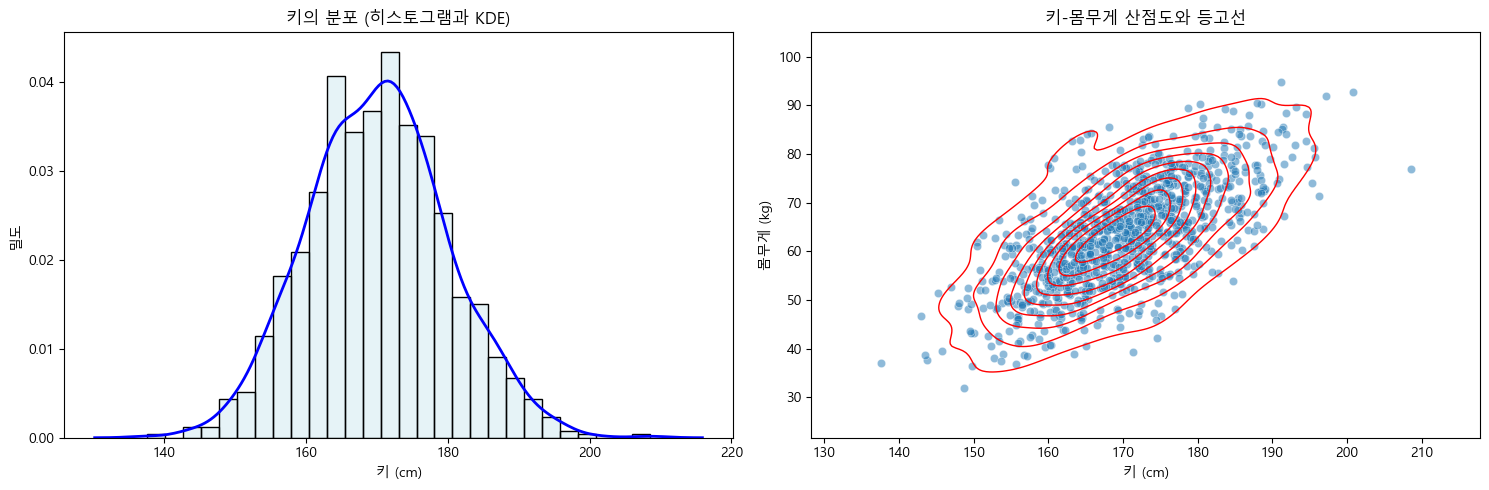

In [43]:
# 1차원 정규분포 (kde)와 2차원 정규분포 (corr plot) 비교하기
# 랜덤 샘플 데이터 생성
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
n_samples = 1000

# 키 데이터 생성 (평균 170cm, 표준편차 10)
height = np.random.normal(170, 10, n_samples)

# 키와 상관관계가 있는 몸무게 데이터 생성
weight = 0.7 * height - np.random.normal(55, 8, n_samples)

# 시각화를 위한 subplot 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 1. 키의 1차원 정규분포 (히스토그램과 KDE)
sns.histplot(data=height, ax=ax1, stat='density', alpha=0.3, color='lightblue')
sns.kdeplot(data=height, ax=ax1, color='blue', linewidth=2)
ax1.set_title('키의 분포 (히스토그램과 KDE)')
ax1.set_xlabel('키 (cm)')
ax1.set_ylabel('밀도')

# 2. 키-몸무게의 2차원 산점도와 등고선
sns.scatterplot(x=height, y=weight, alpha=0.5, ax=ax2)
sns.kdeplot(x=height, y=weight, levels=10, color='red', linewidths=1, ax=ax2)
ax2.set_title('키-몸무게 산점도와 등고선')
ax2.set_xlabel('키 (cm)')
ax2.set_ylabel('몸무게 (kg)')

plt.tight_layout()


3.2.1 다변량정규분포의 정의
x는 D개의 확률 변수를 모아놓은 벡터라고 합니다.
$$
\mathbf{x} = \begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_D
\end{pmatrix}
$$

또한 x는 분포가 같은 D개의 독립적인 샘플이 아닙니다.<br>
> 키와 몸무게 처럼 연관된 데이터로 간주합니다.


- D차원의 데이터가 대상으므로 평균백터 $\mu$는 원소가 D개로 이루어진 백터
<img src="img\f3-1.png" width="400">
- μ (mu)는 평균 벡터
- Σ (Sigma)는 D x D인 공분산 행렬이며 대각선 성분은 각변수의 분산을, 그외 성분은 각 변수사이의 공분산을 나타냄
- 또한 확률변수 $x_i$와 $x_j$의 공분산은 $\sigma_{ij}$ 로 표현 :$\sigma_{ij}$에 따라 두 변수의 연관성이 결정
<br>
- 이 때, x에 대한 정규분포는 다음식으로 표현됩니다.
$$
N(\mathbf{x;\mu,\Sigma}) = \frac{1}{\sqrt{(2\pi)^{D}|\Sigma|}} \exp\left(-\frac{1}{2}(\mathbf{x}-\mu)^T\Sigma^{-1}(\mathbf{x}-\mu)\right)
$$
- 
    - p(x)는 벡터 x에 대한 확률밀도값
    - D는 차원 수
    - |Σ|는 공분산 행렬의 행렬식
    - $\Sigma^{-1}$ : 공분산의 역행렬
    - (x-μ)는 평균과의 차이를 나타내는 벡터
    - 지수 부분은 마할라노비스 거리의 제곱을 나타냄<br>





#### 공분산 (Covariance)

- 공분산 $\sigma_{ij} = E[(x_i - \mu_i)(x_j - \mu_j)]$
  + 두 확률변수의 상관관계를 나타내는 지표
  + 두 변수가 어떻게 함께 변화하는지를 측정

- 공분산 행렬의 특징
  + 대칭행렬: $\sigma_{ij} = \sigma_{ji}$ (순서가 바뀌어도 동일)
  + 대각성분: $\sigma_{ii}$는 i번째 변수의 분산
  + 양의 준정부호 행렬 (positive semi-definite)

- 공분산의 해석
  + 양수: 한 변수가 증가할 때 다른 변수도 증가하는 경향
  + 음수: 한 변수가 증가할 때 다른 변수는 감소하는 경향
  + 0에 가까울수록: 두 변수간 선형관계가 약함

#### 전치 (Transpose)

- 전치 $(a_{ij})^T = a_{ji}$
  + 행렬 A의 전치는 $A^T$로 표기
  + 행과 열을 서로 바꾼 행렬

- 행벡터/열벡터의 전치
  + 행벡터 $\mathbf{x} = [x_1 \; x_2 \; x_3]$ 의 전치: $\mathbf{x}^T = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}$
  + 열벡터의 전치는 행벡터가 됨

- 벡터의 내적과 전치
  + 두 벡터 $\mathbf{x}, \mathbf{y}$의 내적은 전치를 사용하여 다음과 같이 표현:
  + $\mathbf{x} \cdot \mathbf{y} = \mathbf{x}^T\mathbf{y}$
  + 예: $[x_1 \; x_2] \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} = x_1y_1 + x_2y_2$

In [44]:
# 2x3 행렬 생성
A = np.array([[1, 2, 3],
              [4, 5, 6]])

print("원본 행렬 A:")
print(A)
print("\nA의 shape:", A.shape)

# 전치 행렬 구하기
A_T = A.T

print("\n전치 행렬 A_T:")
print(A_T) 
print("\nA_T의 shape:", A_T.shape)

# 벡터의 전치 예제
x = np.array([1, 2, 3])  # 행벡터
print("\n행벡터 x:")
print(x)
print("\n열벡터로 변환(x.T):")
print(x.reshape(-1,1))  # reshape을 사용하여 열벡터로 변환

원본 행렬 A:
[[1 2 3]
 [4 5 6]]

A의 shape: (2, 3)

전치 행렬 A_T:
[[1 4]
 [2 5]
 [3 6]]

A_T의 shape: (3, 2)

행벡터 x:
[1 2 3]

열벡터로 변환(x.T):
[[1]
 [2]
 [3]]


#### 행렬식 (Determinant) |Σ|

- 행렬식의 정의
  + n x n 정방행렬을 하나의 수로 대응시키는 함수
  + 행렬 A의 행렬식은 det(A) 또는 |A|로 표기
  + 기하학적으로는 행렬이 나타내는 선형변환에 의한 면적/부피의 변화량을 의미

- 2x2 행렬의 행렬식 계산
  + 2x2 행렬 A = [a b]
                 [c d]
  + det(A) = |A| = ad - bc
  + 예: A = [[2 3],[4 5]] 일때,<br>
    |A| = (2×5) - (3×4) = 10 - 12 = -2

#### 역행렬 (Inverse Matrix)

- 역행렬의 정의
  + 행렬 A와 곱했을 때 단위행렬이 되는 행렬을 A의 역행렬이라고 하며 $A^{-1}$로 표기
  + $A \cdot A^{-1} = A^{-1} \cdot A = I$ (I는 단위행렬)
  + 모든 행렬이 역행렬을 가지는 것은 아님 (행렬식이 0이 아닌 정방행렬만 역행렬 존재)

> 단위행렬(Identity Matrix)
> - 주대각선의 원소가 모두 1이고 나머지 원소는 0인 정방행렬
> - n차 단위행렬은 다음과 같이 표현: 
> ```
> I = [1 0 0]
>     [0 1 0]
>     [0 0 1]
> ```

- 역행렬의 주요 성질
  + $(A^{-1})^{-1} = A$
  + $(AB)^{-1} = B^{-1}A^{-1}$
  + $(A^T)^{-1} = (A^{-1})^T$

In [45]:
# 넘파이에서는  np.linalg.inv()함수로 역행렬을 구할 수 있음

# 2x2 행렬 A를 생성합니다
A=np.array([[3,4],[5,6]])

# np.linalg.inv() 함수를 사용하여 A의 역행렬 B를 구합니다
B=np.linalg.inv(A)

# 역행렬 B를 출력합니다
print("A의 역행렬:")
print(B)

# A와 B를 행렬곱(@)하여 단위행렬이 나오는지 확인합니다
print("\nA와 A의 역행렬을 곱한 결과 (단위행렬이어야 함):")
print(A@B)


A의 역행렬:
[[-3.   2. ]
 [ 2.5 -1.5]]

A와 A의 역행렬을 곱한 결과 (단위행렬이어야 함):
[[ 1.0000000e+00 -8.8817842e-16]
 [ 0.0000000e+00  1.0000000e+00]]


### 3.2.2 다변량정규분포의 구현
- 다변량 정규분포를 코드로 구현해보자
$$
N(\mathbf{x;\mu,\Sigma}) = \frac{1}{\sqrt{(2\pi)^{D}|\Sigma|}} \exp\left(-\frac{1}{2}(\mathbf{x}-\mu)^T\Sigma^{-1}(\mathbf{x}-\mu)\right)
$$

In [46]:
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(mu)
    z = 1 / np.sqrt((2*np.pi)**D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) /-2)
    return y

In [47]:
x = np.array([[0],[0]])
mu = np.array([[1],[2]])
cov = np.array([[1,0],
               [0,1]])
y = multivariate_normal(x,mu,cov)

print(x.shape)
print(mu.shape)
print(y)


(2, 1)
(2, 1)
[[0.01306423]]


## 3.3 2차원 정규 분포 시각화

### 3.3.1 3D 그래프 시각화





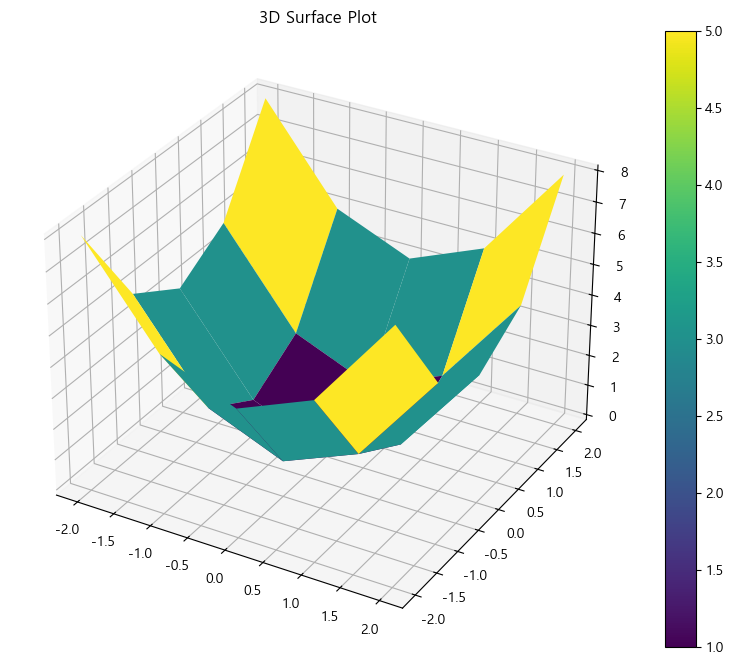

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 데이터 생성
x = np.linspace(-2, 2, 5)
y = np.linspace(-2, 2, 5)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# 3D 그래프 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# surface plot 생성
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# 컬러바 추가
fig.colorbar(surf)

plt.title('3D Surface Plot')
plt.show()

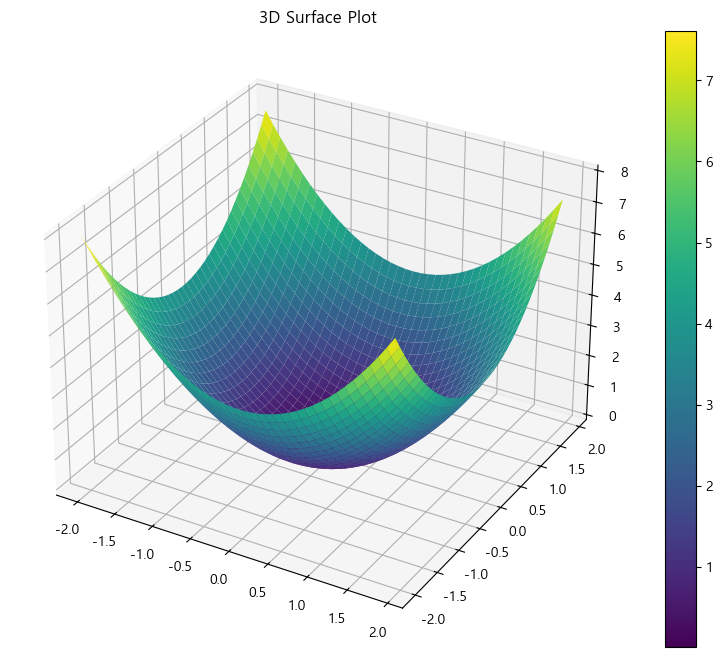

In [49]:
# 더 세밀한 그래프 
# 데이터 생성
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# 3D 그래프 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# surface plot 생성
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# 컬러바 추가
fig.colorbar(surf)

plt.title('3D Surface Plot')
plt.show()

### 3.3.2 등고선 그리기
> plot_surface()는 함수의 곡면을 그렸는데, 
> 등고선 그리기는 contour를 사용

Text(0, 0.5, 'y')

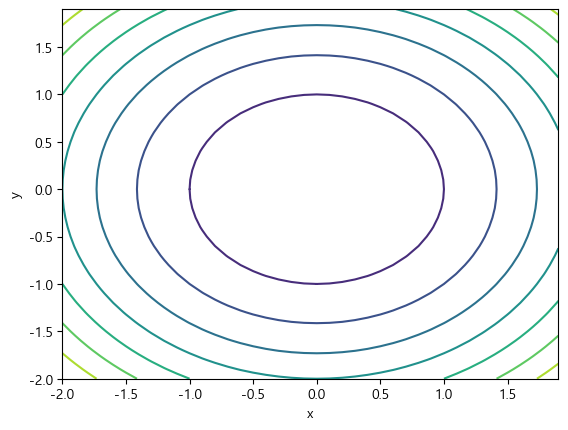

In [50]:
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
ax = plt.axes()
ax.contour(X,Y,Z)
ax.set_xlabel('x')
ax.set_ylabel('y')

### 3.3.3 2차원 정규분포 그래프

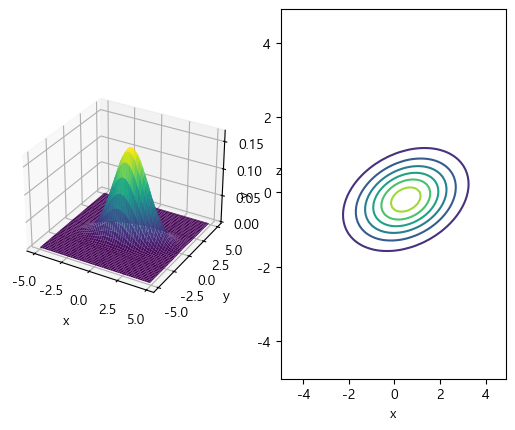

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

mu = np.array([0.5, -0.2])
cov = np.array([[2.0, 0.3],
                [0.3, 0.5]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
plt.show()


## 3.4 다변량 정규분포의 최대가능도 추정
> 이번절에서는 대상을 다변량 정규분포로 확장하여 최대가능도 추정 수행
$$
N(\mathbf{x;\mu,\Sigma}) = \frac{1}{\sqrt{(2\pi)^{D}|\Sigma|}} \exp\left(-\frac{1}{2}(\mathbf{x}-\mu)^T\Sigma^{-1}(\mathbf{x}-\mu)\right)
$$

### 3.4.1 최대가능도 추정의 정의
다변량 정규분포의 최대가능도 추정은 
- 관측된 데이터를 가장 잘 설명하는 모수(평균 벡터 μ와 공분산 행렬 Σ)를 찾는 과정입니다.

최대가능도 추정의 목적:
1. 주어진 데이터 집합 X = {x₁, x₂, ..., xₙ}에 대해
2. 가능도 함수 L(μ,Σ)를 최대화하는 모수 μ와 Σ를 찾는 것

가능도 함수는 다음과 같이 정의됩니다:
- $L(μ,Σ)$ 
<br> = $\mathcal{N}(x^{(1)} ; μ,Σ)\mathcal{N}(x^{(2)} ; μ,Σ)...\mathcal{N}(x^{(N)} ; μ,Σ)$
<br> = $\prod_{n=1}^N \mathcal{N}(x^{(n)}; \mu, \Sigma)$

최대가능도 추정량을 구하기 위해:
- 로그 가능도 함수를 μ와 Σ에 대해 편미분하여
- 각각을 0으로 놓은 방정식에 대한 해를 구함<br>
![](./img/f3-4.png)<br>
- μ에 대한 최대가능도 추정량: μ_MLE = (1/n)∑xᵢ
- Σ에 대한 최대가능도 추정량: Σ_MLE = (1/n)∑(xᵢ-μ)(xᵢ-μ)ᵀ 




### 3.4.2 최대가능도 추정의 구현


In [4]:
# numpy 라이브러리 임포트
import numpy as np

# 난수 생성을 위한 시드 설정
np.random.seed(0)

# 데이터 생성
N=10000  # 샘플 수
D=2      # 차원 수 
xs = np.random.rand(N,D)  # N x D 크기의 균일 분포 난수 생성

# 평균 벡터(μ) 계산
mu = np.sum(xs,axis=0)  # 각 차원별 합계
mu /= N                 # 샘플 수로 나누어 평균 계산

# 공분산 행렬(Σ) 계산 초기화
cov = 0

# 공분산 행렬 계산
for n in range(N):
    x=xs[n]            # n번째 데이터 포인트
    z= x-mu            # 평균과의 차이
    z= z[:,np.newaxis] # 열벡터로 변환
    cov += z@z.T       # 외적 계산 후 누적

# 샘플 수로 나누어 최종 공분산 행렬 계산
cov/=N

# 결과 출력
print(mu)   # 평균 벡터 출력
print(cov)  # 공분산 행렬 출력


[0.49443495 0.49726356]
[[ 0.08476319 -0.00023128]
 [-0.00023128  0.08394656]]


In [6]:
# numpy의 내장 함수를 사용한 계산
# mean() 함수로 평균 벡터 계산
mu = np.mean(xs, axis=0)  # 각 차원별 평균 계산

# cov() 함수로 공분산 행렬 계산
# rowvar=False: 행이 관측치, 열이 변수를 의미
cov = np.cov(xs, rowvar=False)  # 공분산 행렬 계산

print(mu)   # 평균 벡터 출력
print(cov)  # 공분산 행렬 출력

[0.49443495 0.49726356]
[[ 0.08477167 -0.0002313 ]
 [-0.0002313   0.08395496]]


### 3.4.3 실제데이터 사용
- 실제데이터를 이용하여 다변량 정규분포의 최대가능도 추정을 알아봄 

(25000, 2)


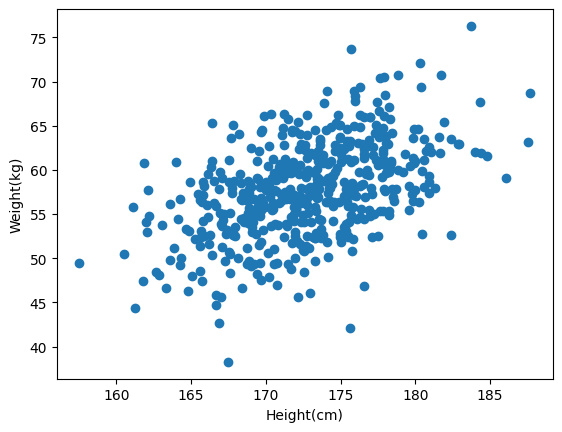

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
path = '.\deep-learning-from-scratch-5-main\step03\height_weight.txt'
# 이데이터셋에는 2.5만개의 키와 몸무게 데이터 있음

xs = np.loadtxt(path)

print(xs.shape)

small_xs = xs[:500]
plt.scatter(small_xs[:, 0], small_xs[:, 1])
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')
plt.show()

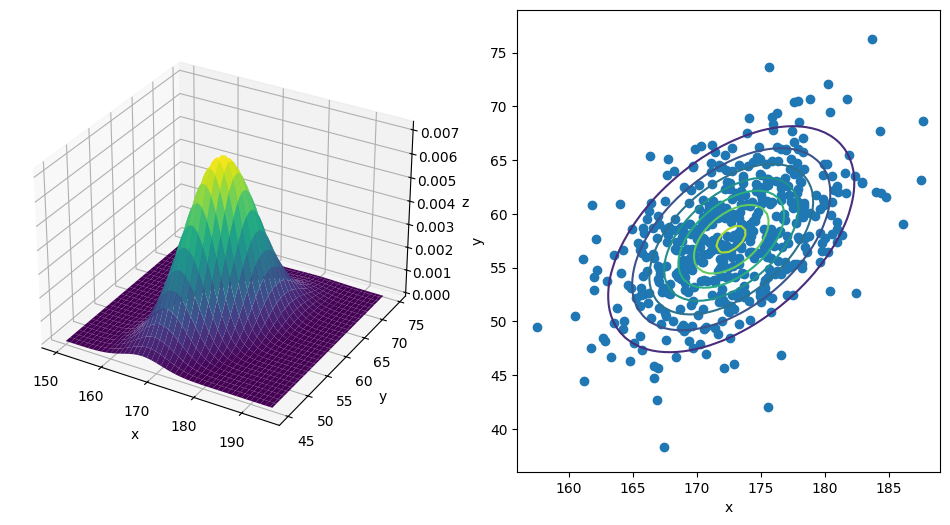

In [8]:
import numpy as np
import matplotlib.pyplot as plt

path = '.\deep-learning-from-scratch-5-main\step03\height_weight.txt'

xs = np.loadtxt(path)

# Maximum Likelihood Estimation(MLE)
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

small_xs = xs[:500]
X, Y = np.meshgrid(np.arange(150, 195, 0.5),
                   np.arange(45, 75, 0.5))
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(small_xs[:,0], small_xs[:,1])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(156, 189)
ax2.set_ylim(36, 79)
ax2.contour(X, Y, Z)
plt.show()

- 결과를 보면 데이터에 잘 들어맞음을 알 수 있음
- 어떤 다차원데이터라도 정규분포이기만 하면 모델링 할 수 있음